In [1]:
import networkx as nx
import pandas as pd
from tqdm import tqdm
import numpy as np
import networkx as nx
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import scipy
from random import sample
import csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pickle

In [2]:
bc_auroc = [0.6512,0.6502,0.6521,0.6504,0.6504]
bc_auprc = [0.4446,0.4443,0.4436,0.4442,0.4436]

bc_nn_auroc = [0.6785,0.6762,0.6777,0.6765,0.6783]
bc_nn_auprc = [0.6379,0.6333,0.6440,0.6362,0.6463]

bc_nn_cc_auroc = [0.6747,0.6707,0.6738,0.6731,0.6714]
bc_nn_cc_auprc = [0.6391,0.6367,0.6468,0.6388,0.6446]

bc_nn_cc_tri_auroc = [0.7137,0.7125,0.7129,0.7125,0.7128]
bc_nn_cc_tri_auprc = [0.6403,0.6388,0.6386,0.6396,0.6385]

bc_nn_cc_tri_deg_auroc = [0.7409,0.7415,0.7424,0.7406,0.7422]
bc_nn_cc_tri_deg_auprc = [0.7085,0.7109,0.7124,0.7101,0.7118]

In [3]:
imp_bc = [-0.0571,-0.0552,-0.0590,-0.0565,-0.0523]
imp_nn = [-0.0745,-0.0698,-0.0828,-0.0637,-0.0733]
imp_cc = [0.5481,0.5693,0.5741,0.5483,0.5810]
imp_tri = [-2.4808,-2.4363,-2.4630,-2.4866,-2.4530]
imp_deg = [4.3456,4.2889,4.3279,4.3464,4.3052]

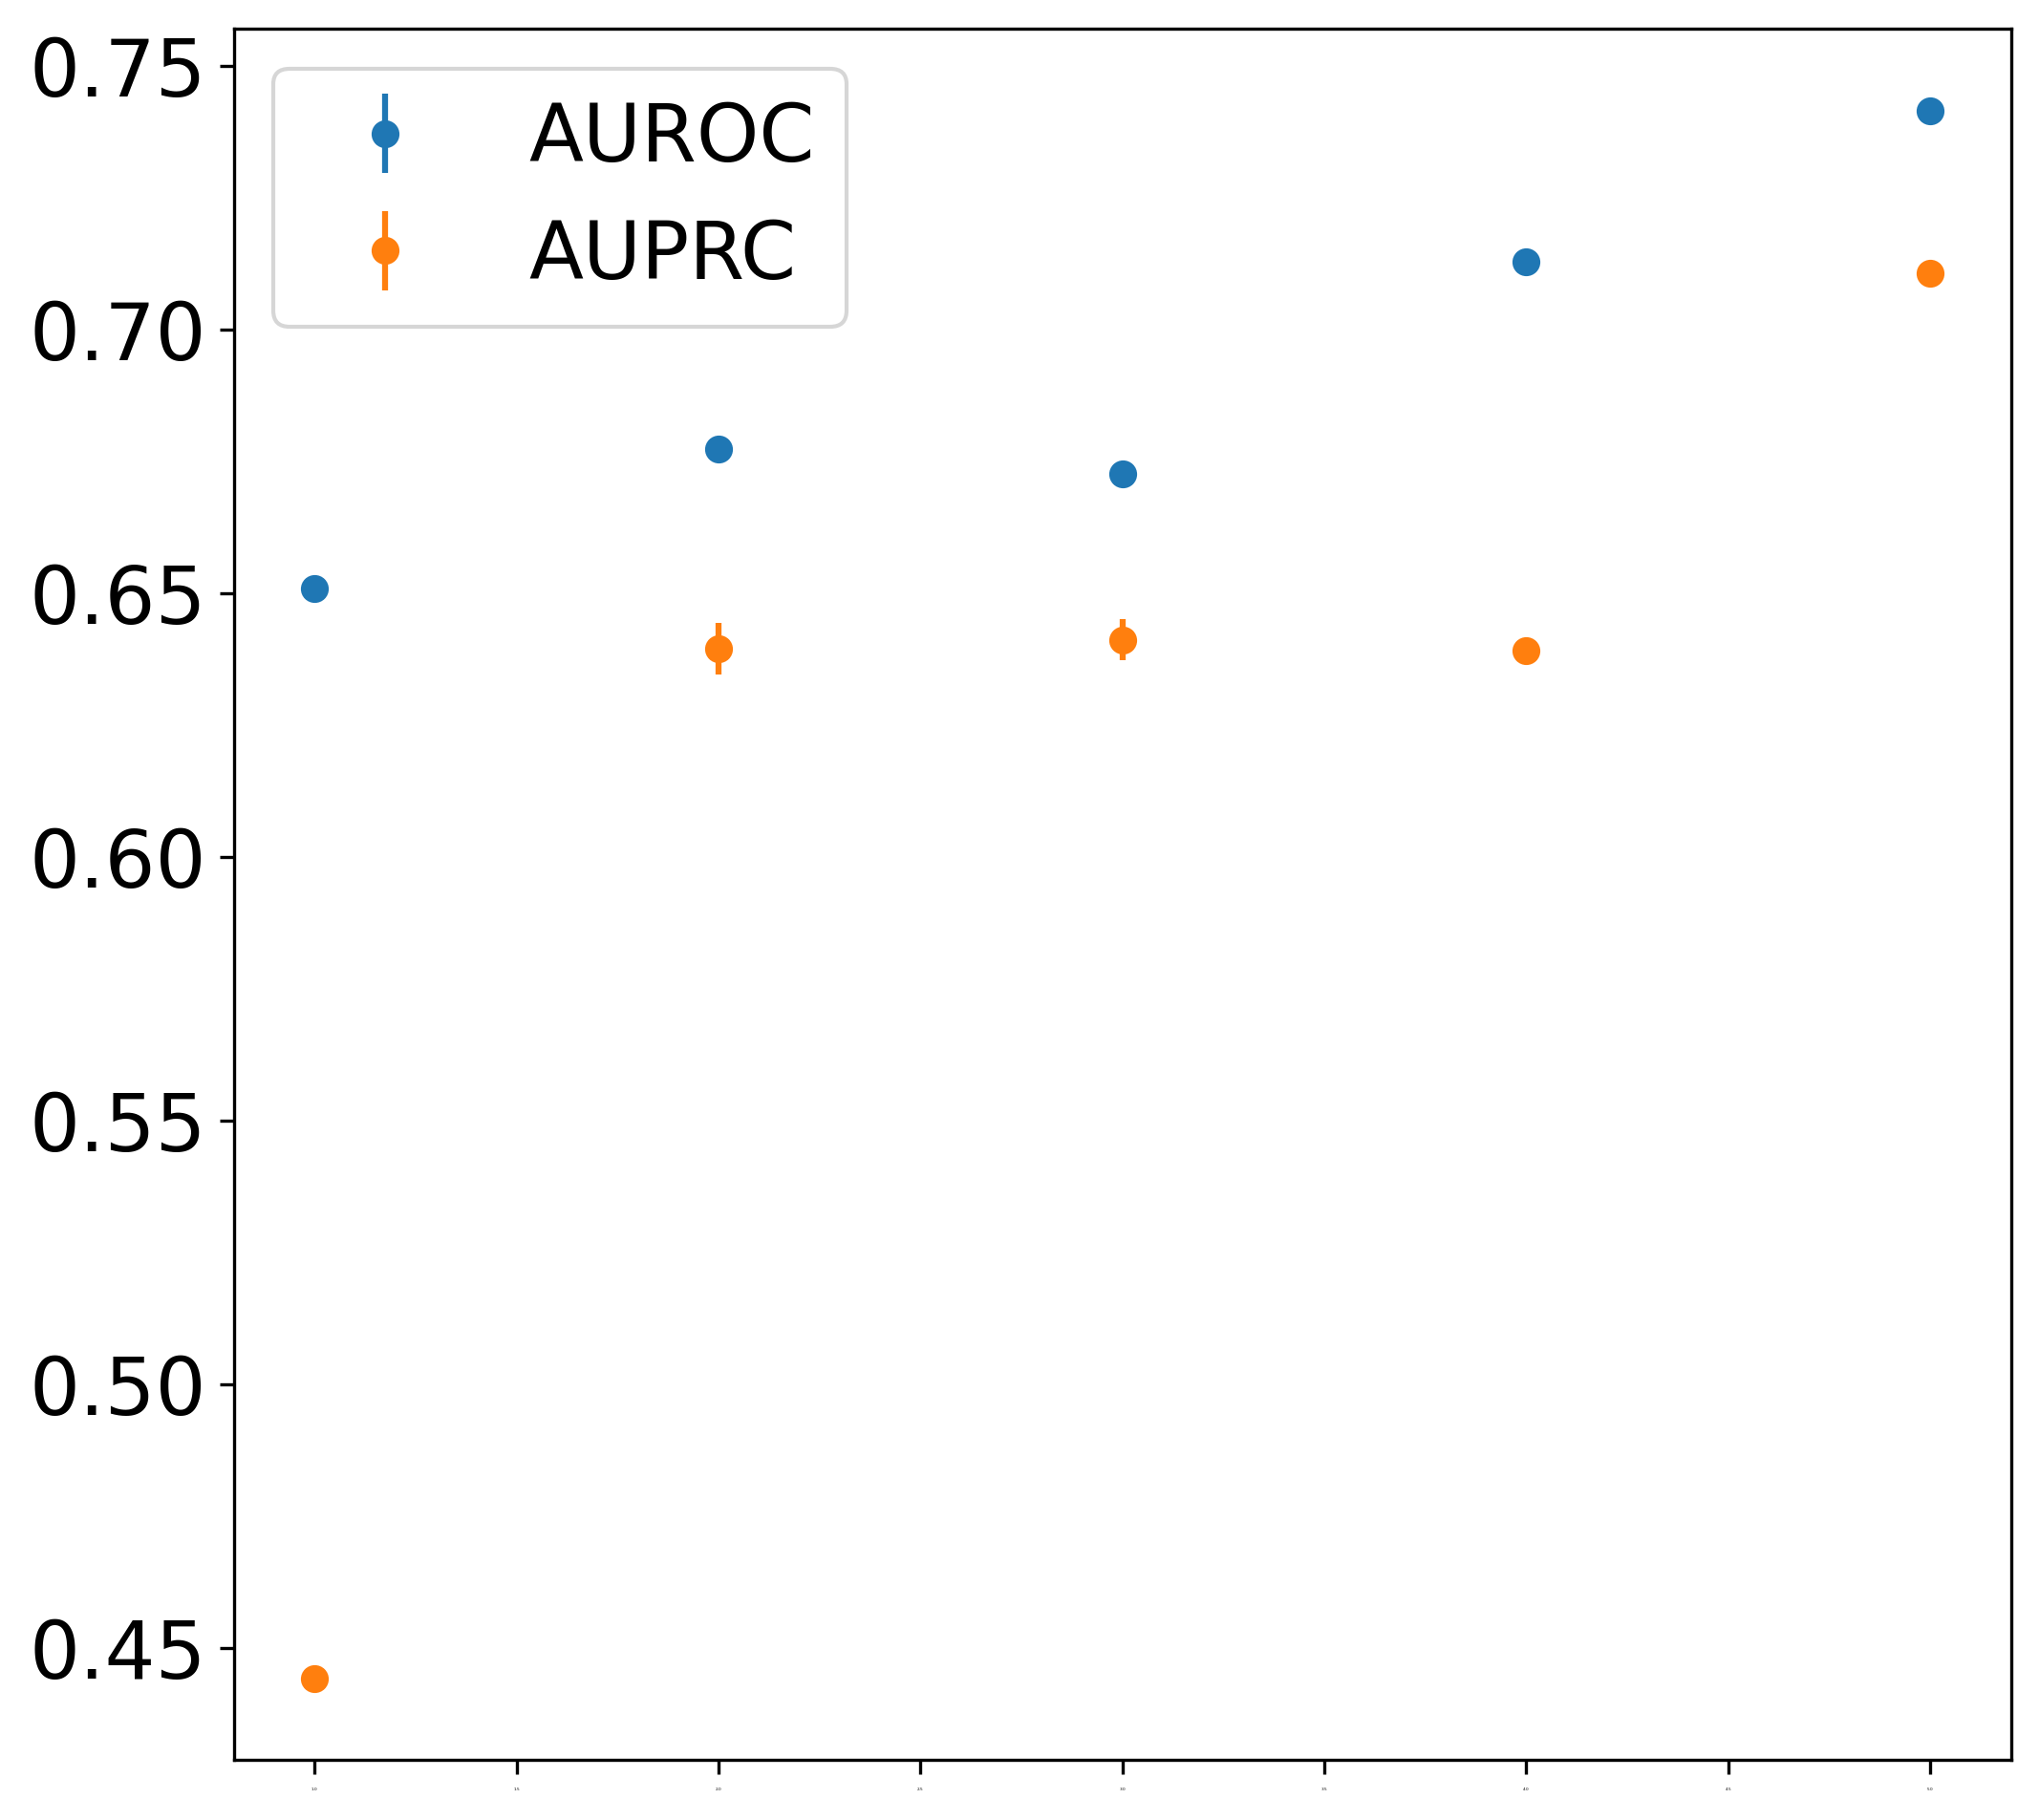

In [29]:
plt.figure(figsize=(8, 8),dpi=300)
plt.errorbar([1,2,3,4,5],values1,yerr=errors1,fmt = 'o',label='AUROC')
plt.errorbar([1,2,3,4,5],values2,yerr=errors2,fmt = 'o',label='AUPRC')
plt.legend(prop={'size': 20})
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
plt.show()

In [27]:
plt.figure(figsize=(8, 8),dpi=300)
categories = ['1','2','3','4','5']
values1 = [np.mean(bc_auroc), np.mean(bc_nn_auroc), np.mean(bc_nn_cc_auroc), np.mean(bc_nn_cc_tri_auroc), np.mean(bc_nn_cc_tri_deg_auroc)]
values2 = [np.mean(bc_auprc), np.mean(bc_nn_auprc), np.mean(bc_nn_cc_auprc), np.mean(bc_nn_cc_tri_auprc), np.mean(bc_nn_cc_tri_deg_auprc)]

errors1 = [np.std(bc_auroc), np.std(bc_nn_auroc), np.std(bc_nn_cc_auroc), np.std(bc_nn_cc_tri_auroc), np.std(bc_nn_cc_tri_deg_auroc)]
errors2 = [np.std(bc_auprc), np.std(bc_nn_auprc), np.std(bc_nn_cc_auprc), np.std(bc_nn_cc_tri_auprc), np.std(bc_nn_cc_tri_deg_auprc)]

bar_width = 0.35

x = np.arange(len(categories))

#plt.bar(x, values1, bar_width, yerr=errors1, label='AUROC',alpha=0.3)
#plt.bar(x + bar_width, values2, bar_width, yerr=errors2, label='AUPRC', alpha=0.3)

# Adding labels, title, and legend
#plt.ylabel('Performance')
#plt.xticks(x + bar_width/2, categories)
#plt.legend(prop={'size': 20})

#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#plt.show()

<Figure size 2400x2400 with 0 Axes>

In [17]:
print(values1)
print(errors1)
print(values2)
print(errors2)

[0.65086, 0.67744, 0.6727399999999999, 0.71288, 0.7415200000000001]
[0.0007088018058667843, 0.0009329523031752429, 0.001486741403203661, 0.00043999999999999286, 0.0007025667228099832]
[0.44406, 0.63954, 0.6412, 0.63916, 0.71074]
[0.0003979949748426449, 0.004865634593760618, 0.0038298825047251663, 0.0006887670143089028, 0.0013661625086350492]


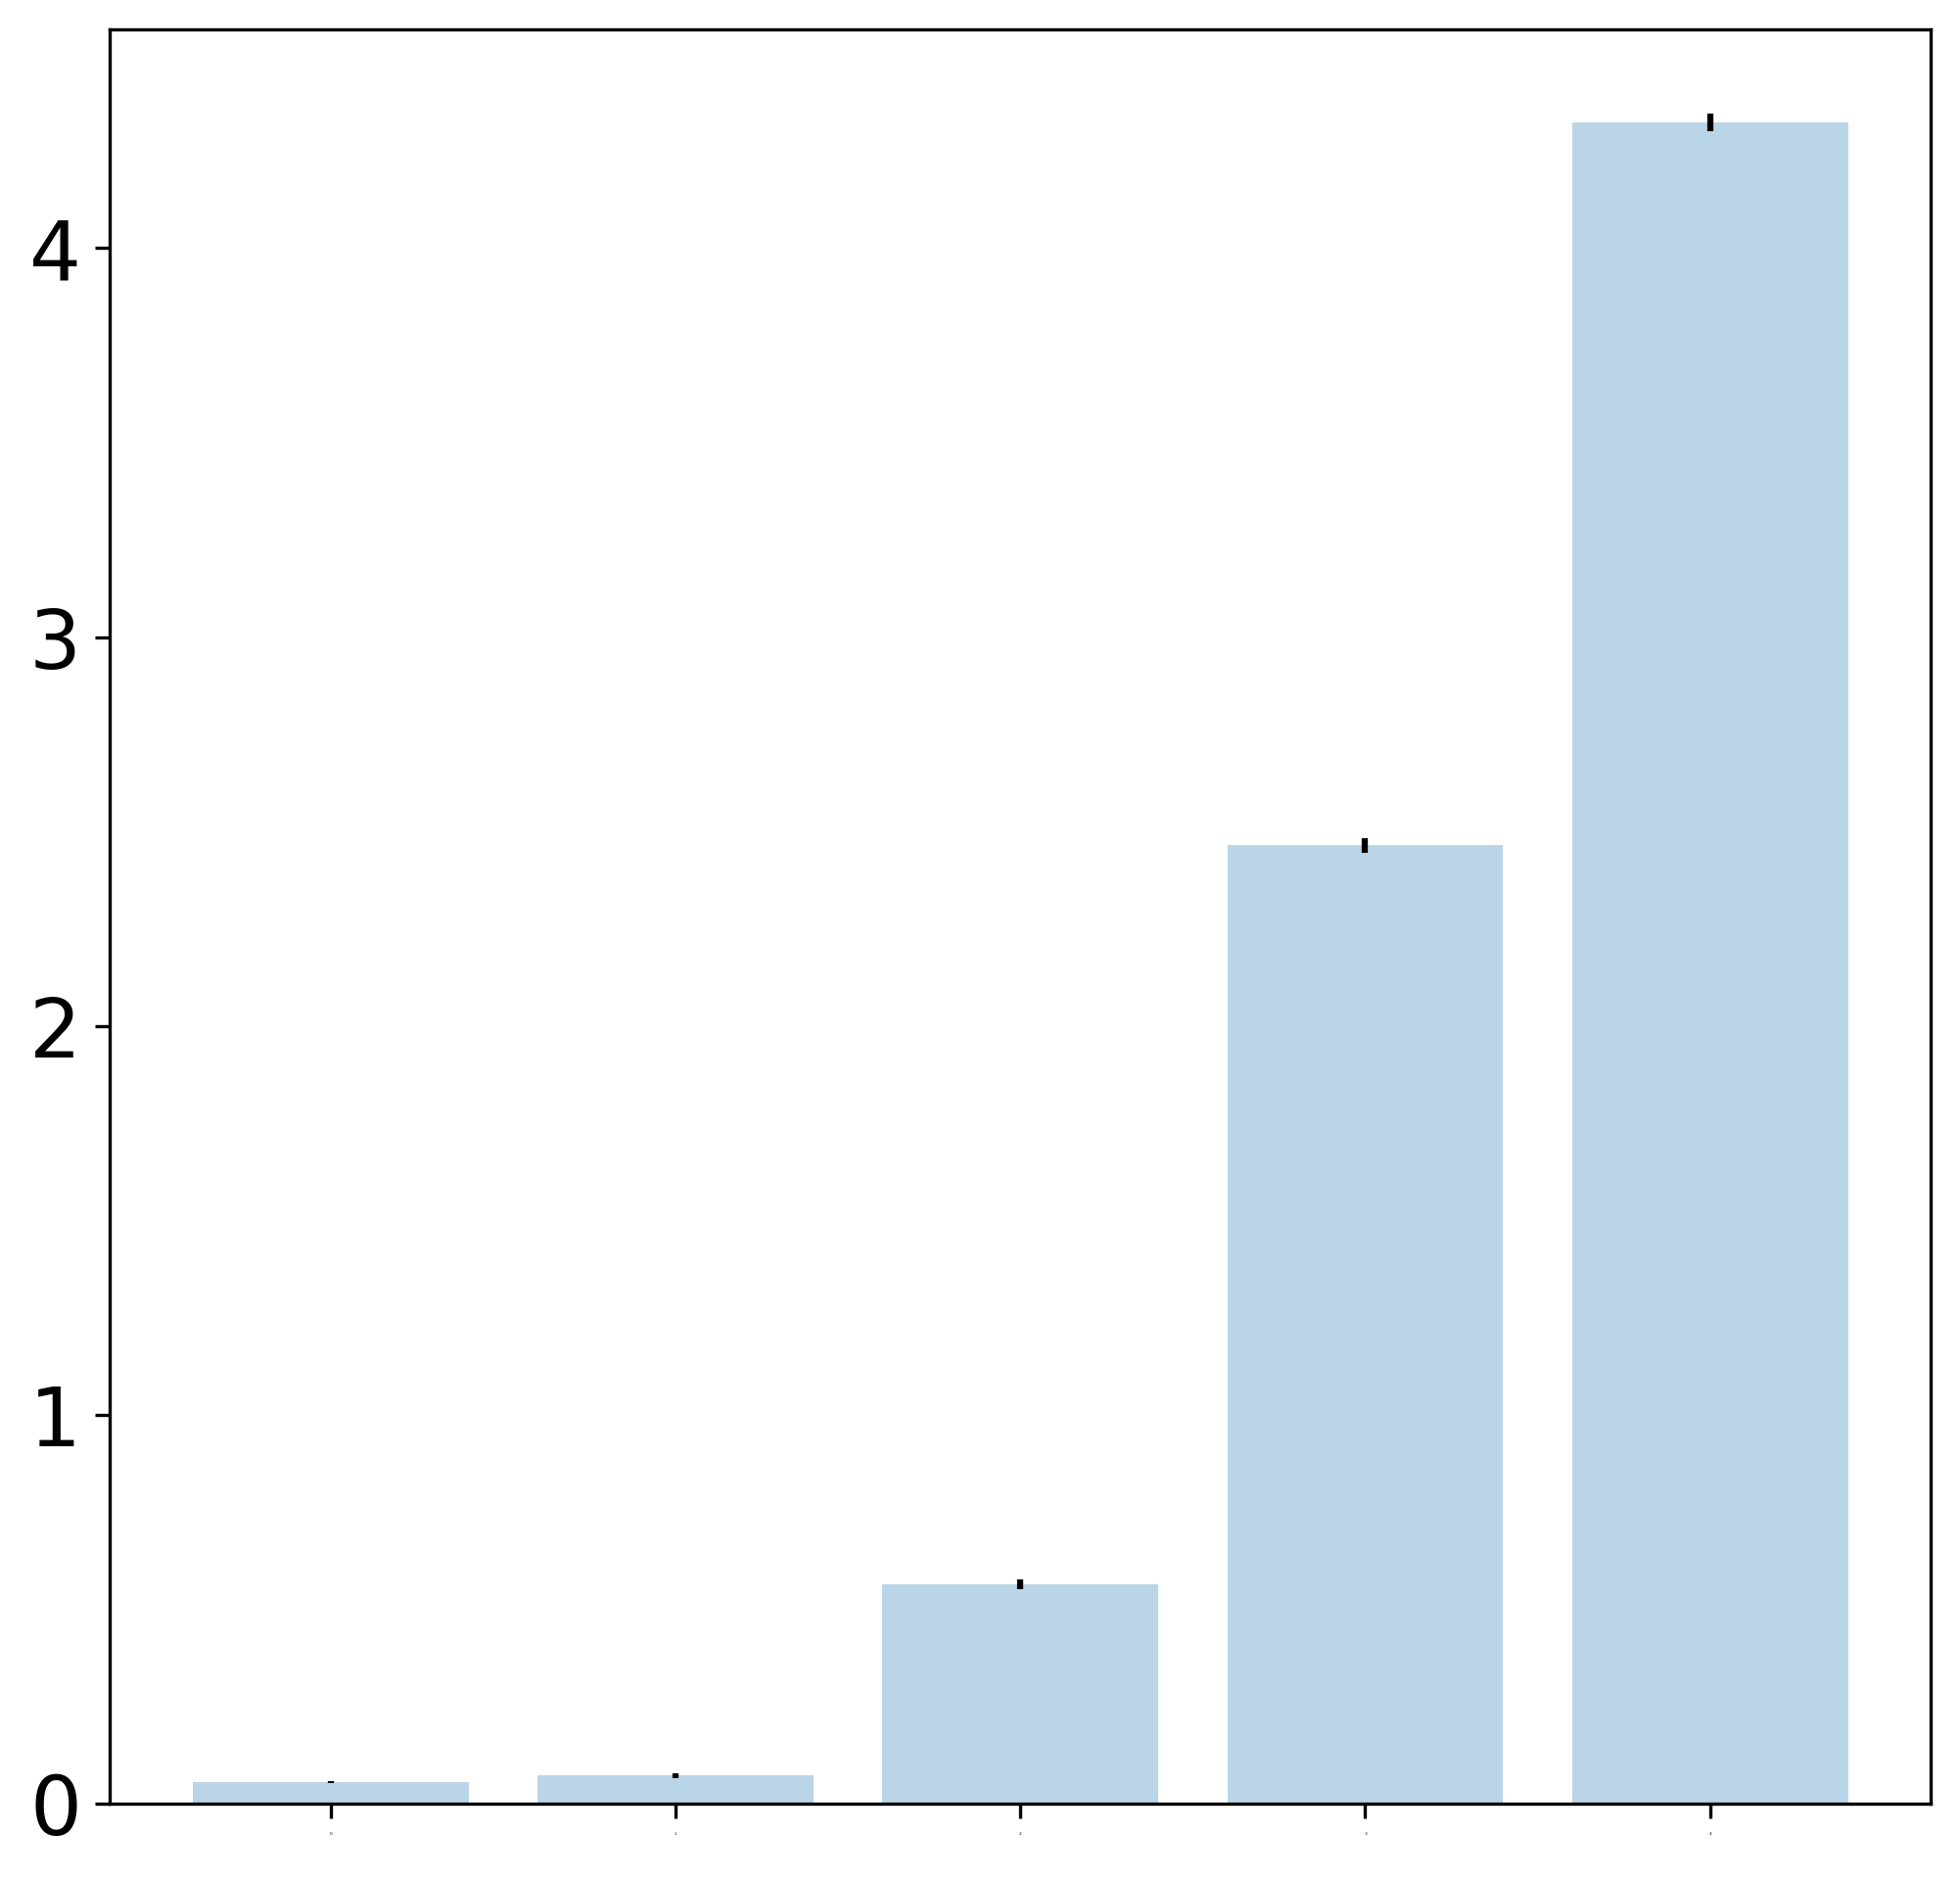

In [30]:
plt.figure(figsize=(8, 8),dpi=300)

categories = ['1','2','3','4','5']
values1 = [np.mean(imp_bc), np.mean(imp_nn), np.mean(imp_cc), np.mean(imp_tri), np.mean(imp_deg)]
errors1 = [np.std(imp_bc), np.std(imp_nn), np.std(imp_cc), np.std(imp_tri), np.std(imp_deg)]

#bar_width = 0.35

x = np.arange(len(categories))

plt.bar(x, np.abs(values1), yerr=errors1,alpha=0.3)
#plt.bar(x + bar_width, values2, bar_width, yerr=errors2, label='AUPRC', alpha=0.3)

# Adding labels, title, and legend
#plt.ylabel('Performance')
#plt.xticks(x + bar_width/2, categories)
#plt.legend(prop={'size': 20})

plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
plt.show()